<a href="https://colab.research.google.com/github/sayantanmandal1/ML-Training-Model/blob/main/dwdm_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML Training**

## **Loading the database**

In [84]:
import pandas as pd
!wget https://raw.githubusercontent.com/sayantanmandal1/ML-Training-Model/refs/heads/main/Train%20new.csv


--2024-10-22 15:50:18--  https://raw.githubusercontent.com/sayantanmandal1/ML-Training-Model/refs/heads/main/Train%20new.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 440457 (430K) [text/plain]
Saving to: ‘Train new.csv.1’

Train new.csv.1     100%[===================>] 430.13K  --.-KB/s    in 0.06s   

2024-10-22 15:50:18 (7.36 MB/s) - ‘Train new.csv.1’ saved [440457/440457]



In [99]:
df = pd.read_csv("/content/Train new.csv")
df=df.drop('Gender', axis=1)
df=df.drop('Warehouse_block', axis=1)

In [100]:
df

,ID,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,Flight,4,2,177,3,low,44,1233,1
1,2,Flight,4,5,216,2,low,59,3088,1
2,3,Flight,2,2,183,4,low,48,3374,1
3,4,Flight,3,3,176,4,medium,10,1177,1
4,5,Flight,2,2,184,3,medium,46,2484,1
...,...,...,...,...,...,...,...,...,...,...
10994,10995,Ship,4,1,252,5,medium,1,1538,1
10995,10996,Ship,4,1,232,5,medium,6,1247,0
10996,10997,Ship,5,4,242,5,low,4,1155,0
10997,10998,Ship,5,2,223,6,medium,2,1210,0


In [101]:
df.isna()

,ID,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
10994,False,False,False,False,False,False,False,False,False,False
10995,False,False,False,False,False,False,False,False,False,False
10996,False,False,False,False,False,False,False,False,False,False
10997,False,False,False,False,False,False,False,False,False,False


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Discount_offered     10999 non-null  int64 
 8   Weight_in_gms        10999 non-null  int64 
 9   Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 859.4+ KB


In [103]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report



In [104]:
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['Mode_of_Shipment'])

In [105]:
df['label']

,label
0,0
1,0
2,0
3,0
4,0
...,...
10994,2
10995,2
10996,2
10997,2


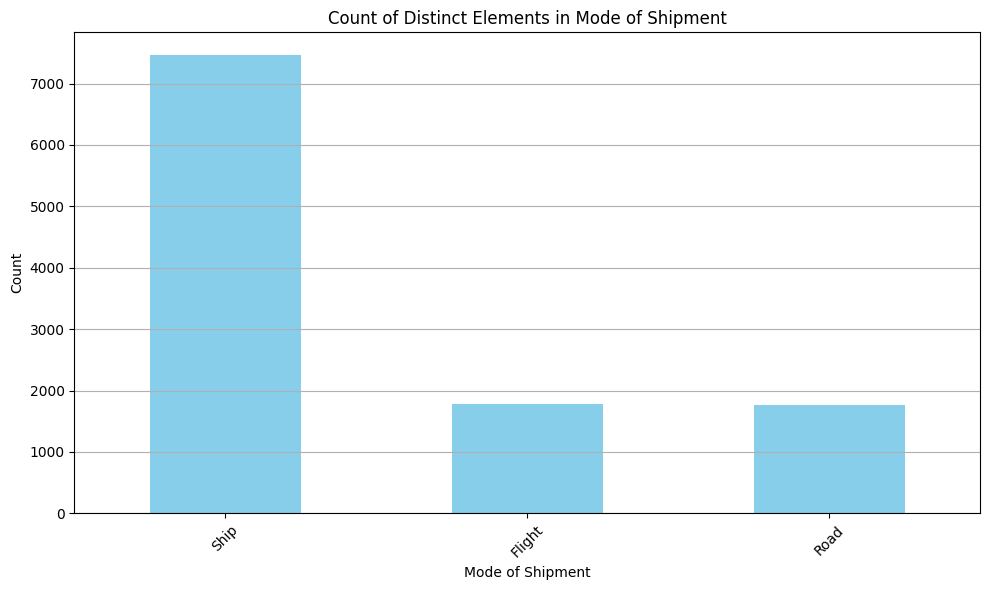

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
shipment_counts = df['Mode_of_Shipment'].value_counts()
shipment_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Distinct Elements in Mode of Shipment')
plt.xlabel('Mode of Shipment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

In [106]:
X = df.drop("label", axis=1)

y = df["label"]

In [107]:
X

,ID,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,Flight,4,2,177,3,low,44,1233,1
1,2,Flight,4,5,216,2,low,59,3088,1
2,3,Flight,2,2,183,4,low,48,3374,1
3,4,Flight,3,3,176,4,medium,10,1177,1
4,5,Flight,2,2,184,3,medium,46,2484,1
...,...,...,...,...,...,...,...,...,...,...
10994,10995,Ship,4,1,252,5,medium,1,1538,1
10995,10996,Ship,4,1,232,5,medium,6,1247,0
10996,10997,Ship,5,4,242,5,low,4,1155,0
10997,10998,Ship,5,2,223,6,medium,2,1210,0


In [108]:
y

,label
0,0
1,0
2,0
3,0
4,0
...,...
10994,2
10995,2
10996,2
10997,2


In [110]:
import numpy as np
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [111]:
len(X_train)

8799

In [112]:
len(X_test)

2200

In [113]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Mode_of_Shipment
Product_importance


In [114]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   10999 non-null  int64   
 1   Mode_of_Shipment     10999 non-null  category
 2   Customer_care_calls  10999 non-null  int64   
 3   Customer_rating      10999 non-null  int64   
 4   Cost_of_the_Product  10999 non-null  int64   
 5   Prior_purchases      10999 non-null  int64   
 6   Product_importance   10999 non-null  category
 7   Discount_offered     10999 non-null  int64   
 8   Weight_in_gms        10999 non-null  int64   
 9   Reached.on.Time_Y.N  10999 non-null  int64   
 10  label                10999 non-null  int64   
dtypes: category(2), int64(9)
memory usage: 795.2 KB


In [116]:
df

,ID,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,label
0,1,Flight,4,2,177,3,low,44,1233,1,0
1,2,Flight,4,5,216,2,low,59,3088,1,0
2,3,Flight,2,2,183,4,low,48,3374,1,0
3,4,Flight,3,3,176,4,medium,10,1177,1,0
4,5,Flight,2,2,184,3,medium,46,2484,1,0
...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,Ship,4,1,252,5,medium,1,1538,1,2
10995,10996,Ship,4,1,232,5,medium,6,1247,0,2
10996,10997,Ship,5,4,242,5,low,4,1155,0,2
10997,10998,Ship,5,2,223,6,medium,2,1210,0,2


In [117]:
df2=df.drop("Mode_of_Shipment",axis=1)

In [118]:
df2

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,label
0,1,4,2,177,3,low,44,1233,1,0
1,2,4,5,216,2,low,59,3088,1,0
2,3,2,2,183,4,low,48,3374,1,0
3,4,3,3,176,4,medium,10,1177,1,0
4,5,2,2,184,3,medium,46,2484,1,0
...,...,...,...,...,...,...,...,...,...,...
10994,10995,4,1,252,5,medium,1,1538,1,2
10995,10996,4,1,232,5,medium,6,1247,0,2
10996,10997,5,4,242,5,low,4,1155,0,2
10997,10998,5,2,223,6,medium,2,1210,0,2


In [120]:
label_encoder = LabelEncoder()
df2['Product_importance'] = label_encoder.fit_transform(df2['Product_importance'])

In [55]:
df2

,ID,Warehouse_block,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,label
0,1,3,4,2,177,3,1,0,44,1233,1,0
1,2,4,4,5,216,2,1,1,59,3088,1,0
2,3,0,2,2,183,4,1,1,48,3374,1,0
3,4,1,3,3,176,4,2,1,10,1177,1,0
4,5,2,2,2,184,3,2,0,46,2484,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,0,4,1,252,5,2,0,1,1538,1,2
10995,10996,1,4,1,232,5,2,0,6,1247,0,2
10996,10997,2,5,4,242,5,1,0,4,1155,0,2
10997,10998,4,5,2,223,6,2,1,2,1210,0,2


In [121]:
X3 = df2.drop("label", axis=1)

y3 = df2["label"]

In [122]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,
                                                    y3,
                                                    test_size=0.2)

In [123]:
model=LogisticRegression()
model.fit(X3_train,y3_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [124]:
model.score(X3_test,y3_test)

0.6681818181818182

In [125]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier


In [127]:
dt = DecisionTreeClassifier()
dt.fit(X3_train, y3_train)
dt.score(X3_test,y3_test)


0.9772727272727273

In [128]:
from sklearn.metrics import accuracy_score, classification_report

In [129]:
y_pred = dt.predict(X3_test)

In [130]:
y_pred

array([1, 2, 2, ..., 2, 2, 0])

In [131]:
y3_test

,label
7785,1
6884,2
383,2
5136,2
6214,2
...,...
2174,1
5365,2
10345,2
7726,2


In [132]:
report=classification_report(y3_test,y_pred,zero_division=True)

In [133]:
report

'              precision    recall  f1-score   support\n\n           0       0.97      0.95      0.96       368\n           1       0.95      0.95      0.95       362\n           2       0.99      0.99      0.99      1470\n\n    accuracy                           0.98      2200\n   macro avg       0.97      0.96      0.97      2200\nweighted avg       0.98      0.98      0.98      2200\n'

In [134]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X3_train, y3_train)

In [135]:
model.fit(X_resampled, y_resampled)
model.score(X3_test,y3_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.42318181818181816

In [136]:
dt.fit(X3_train, y3_train)
dt.score(X3_test,y3_test)

0.9772727272727273

In [138]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X3_train, y3_train)
rf.score(X3_test,y3_test)



0.67

In [139]:
# SVM
svm = SVC()
svm.fit(X3_train, y3_train)
svm.score(X3_test,y3_test)


0.6681818181818182

In [140]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X3_train, y3_train)
knn.score(X3_test,y3_test)

0.6045454545454545

In [141]:
# Naive Bayes
nb = MultinomialNB()
nb.fit(X3_train, y3_train)
nb.score(X3_test,y3_test)


0.21363636363636362

In [142]:
# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X3_train, y3_train)
gb.score(X3_test,y3_test)

0.7131818181818181

In [143]:
# Neural Network
nn = MLPClassifier()
nn.fit(X3_train, y3_train)
nn.score(X3_test,y3_test)

0.3613636363636364